In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

# Second Round Problem

Fifty percent of the people who interviewd for the first round are invited for the second round.

95% of people who got invited for the second round felt that they had a good first round.

75% of the people who did not get invited for the second round felt that they had a good first round. If you feel that you had a good first round, what is the probability that you are invited for the second round?

In [2]:
df_second_round = pd.read_csv("second_round.csv")

In [3]:
df_second_round.head()

,I2,G1
0,0,1
1,0,1
2,0,1
3,0,1
4,1,1


In [4]:
df_second_round.shape

(200, 2)

In [5]:
df_second_round.groupby(["G1", "I2"])["G1"].count().unstack()

I2,0,1
G1,,
0,25,5
1,75,95


In [6]:
pd.crosstab(index=df_second_round["G1"], columns=df_second_round["I2"])

I2,0,1
G1,,
0,25,5
1,75,95


In [7]:
# Conditional probability: Eg P(I2=1 | G1=1) or P(I2 = 1 | G1 = 0), P(I2=0 | G1 = 0)
def conditional_probability(I2, G1):
    df = df_second_round.groupby(["G1", "I2"])["G1"].count().unstack()
    filtered_by_feeling = df.loc[G1]
    numerator = filtered_by_feeling[I2]
    denominator = filtered_by_feeling.sum()
    return numerator / denominator

In [8]:
conditional_probability(I2=1, G1=1)

0.5588235294117647

In [9]:
95 / (95+75)

0.5588235294117647

# CDF

## For the dataset of heights and weights, write a function to plot the empirical CDF

In [10]:
df_hw = pd.read_csv("weight-height.csv")

In [11]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [12]:
df_height = df_hw["Height"]

<AxesSubplot:xlabel='Height', ylabel='Count'>

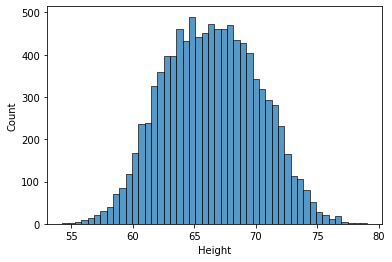

In [13]:
sns.histplot(df_height)

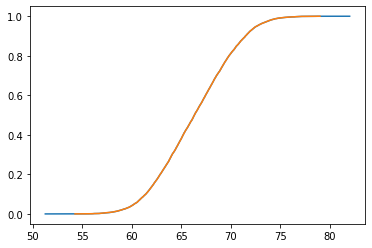

In [14]:
min_height = df_height.min() - 3
max_height = df_height.max() + 3
total = len(df_height)
x_values = np.linspace(min_height, max_height, 1000)
y_values = []
for x in x_values:
    people_shorter_than_x = df_height[df_height <= x]
    num_people_shorter_than_x = len(people_shorter_than_x)
    frac_people_shorter_than_x = num_people_shorter_than_x / total
    y_values.append(frac_people_shorter_than_x)


plt.plot(x_values, y_values)

x_values_2 = ECDF(df_height).x
y_values_2 = ECDF(df_height).y
plt.plot(x_values_2, y_values_2)
plt.show()

# Dice from uniform

## Simulate a dice throw experiment using only np.random.uniform

In [15]:
data = np.random.uniform(size=10000)

<AxesSubplot:ylabel='Count'>

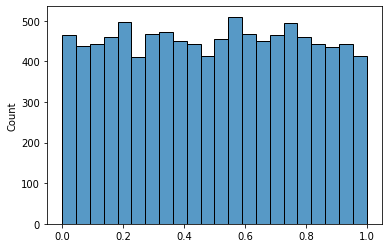

In [16]:
sns.histplot(data)

In [17]:
data_dice = []
for val in data:
    if val < 1/6:
        data_dice.append(1)
    elif val < 2/6:
        data_dice.append(2)
    elif val < 3/6:
        data_dice.append(3)
    elif val < 4/6:
        data_dice.append(4)
    elif val < 5/6:
        data_dice.append(5)
    elif val < 6/6:
        data_dice.append(6)

In [18]:
data_dice

[4,
 6,
 4,
 3,
 3,
 1,
 6,
 1,
 1,
 1,
 4,
 4,
 5,
 2,
 1,
 1,
 6,
 4,
 5,
 5,
 6,
 1,
 6,
 1,
 2,
 1,
 4,
 4,
 5,
 2,
 5,
 2,
 5,
 6,
 4,
 5,
 3,
 6,
 4,
 5,
 6,
 4,
 3,
 6,
 2,
 5,
 4,
 1,
 3,
 2,
 5,
 5,
 6,
 4,
 6,
 1,
 5,
 5,
 4,
 3,
 5,
 6,
 5,
 1,
 6,
 5,
 4,
 4,
 1,
 4,
 6,
 3,
 6,
 3,
 5,
 4,
 1,
 2,
 2,
 3,
 4,
 1,
 5,
 4,
 3,
 6,
 6,
 1,
 3,
 2,
 3,
 3,
 1,
 2,
 3,
 5,
 5,
 1,
 3,
 1,
 6,
 3,
 3,
 3,
 1,
 2,
 4,
 1,
 4,
 5,
 3,
 5,
 1,
 2,
 4,
 2,
 5,
 2,
 5,
 5,
 5,
 2,
 1,
 3,
 1,
 1,
 2,
 6,
 2,
 4,
 5,
 6,
 1,
 2,
 6,
 4,
 3,
 1,
 5,
 6,
 1,
 2,
 4,
 4,
 4,
 3,
 5,
 4,
 5,
 5,
 4,
 2,
 2,
 2,
 3,
 5,
 6,
 2,
 6,
 6,
 4,
 2,
 6,
 3,
 1,
 1,
 4,
 1,
 3,
 2,
 2,
 5,
 2,
 6,
 3,
 4,
 4,
 5,
 4,
 3,
 4,
 2,
 5,
 3,
 5,
 3,
 2,
 3,
 1,
 6,
 6,
 2,
 4,
 2,
 1,
 3,
 3,
 1,
 6,
 2,
 1,
 4,
 6,
 1,
 6,
 4,
 1,
 5,
 2,
 5,
 5,
 6,
 3,
 5,
 5,
 5,
 1,
 6,
 5,
 2,
 4,
 3,
 6,
 2,
 2,
 1,
 4,
 3,
 4,
 5,
 6,
 4,
 6,
 4,
 1,
 3,
 4,
 1,
 5,
 5,
 5,
 2,
 3,
 3,
 4,
 1,
 2,
 2,
 6,
 2,


<AxesSubplot:ylabel='Count'>

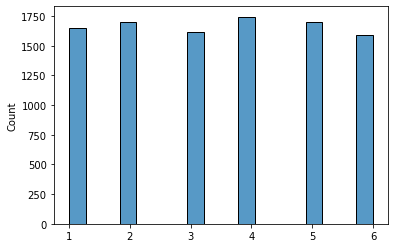

In [19]:
sns.histplot(data_dice)